# GSEA and plotting in python: ANANSE Nr1h3 target genes in Kupffer cells


In [1]:
!pip install gseapy

In [3]:
import pandas as pd
from gseapy.plot import gseaplot
import gseapy as gp
import numpy as np

In [3]:
df_ANANSE_Nr1h3 = pd.read_csv('../Results/ANANSE_network/KC/ANANSE_network_Nr1h3_finalScore.tsv', sep='\t').dropna()

# df_ANANSE_Nr1h3['target'] = df_ANANSE_Nr1h3['target'].str.upper()
# df_ANANSE_Nr1h3['tf'] = df_ANANSE_Nr1h3['tf'].str.upper()

df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.rename(columns = {'is.target.a.TF': 'is_target_a_TF'})

df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.rename(columns = {'rank.pct_diff': 'rank_pct_diff'})
df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.rename(columns = {'rank.FC': 'rank_FC'})
df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.rename(columns = {'rank.prob': 'rank_prob'})

df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.rename(columns = {'specif.score': 'specif_score'})
df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.rename(columns = {'rank.specific': 'rank_specific'})

df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.rename(columns = {'selection.score': 'selection_score'})
df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.rename(columns = {'rank.selection': 'rank_selection'})

df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.drop("Unnamed: 0", axis=1)

# df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3[df_ANANSE_Nr1h3.padj < 0.05] #it is best practice not to filter
df_ANANSE_Nr1h3

,tf,target,prob,tf_expression,target_expression,weighted_binding,activity,is_target_a_TF,rank_pct_diff,rank_FC,specif_score,rank_specific,rank_prob,selection_score,rank_selection
0,Nr1h3,Sdc3,0.926044,0.993432,0.998457,0.999360,0.712928,no,24831,24849,9.986727e-01,24844,24849,1.000000,1
1,Nr1h3,Cd74,0.926198,0.993432,0.999383,0.999049,0.712928,no,24816,24840,9.977079e-01,24833,24852,0.999678,2
2,Nr1h3,Hmox1,0.925359,0.993432,0.997300,0.997775,0.712928,no,24838,24839,9.985522e-01,24839,24843,0.999557,3
3,Nr1h3,Lgmn,0.926032,0.993432,0.998920,0.998850,0.712928,no,24791,24848,9.970238e-01,24825,24848,0.999195,4
4,Nr1h3,Tyrobp,0.924995,0.993432,0.998843,0.994779,0.712928,no,24815,24833,9.973866e-01,24829,24838,0.998954,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24852,Nr1h3,Igfbp7,0.742821,0.993432,0.820738,0.444186,0.712928,no,82,1,1.213896e-07,3,15478,0.000047,24853
24853,Nr1h3,Lifr,0.778788,0.993432,0.817035,0.591756,0.712928,no,7,10,1.019672e-07,2,17594,0.000029,24854
24854,Nr1h3,Vmn2r7.1,0.426590,0.993432,0.000000,0.000000,0.712928,no,14737,14698,3.505802e-01,14744,2,0.000020,24855
24855,Nr1h3,S100a10,0.817909,0.993432,0.772673,0.792604,0.712928,no,1,7,0.000000e+00,1,20055,0.000004,24856


In [4]:
df_ANANSE_Nr1h3 = df_ANANSE_Nr1h3.sort_values('selection_score', ascending = False).reset_index(drop = True)
df_ANANSE_Nr1h3

,tf,target,prob,tf_expression,target_expression,weighted_binding,activity,is_target_a_TF,rank_pct_diff,rank_FC,specif_score,rank_specific,rank_prob,selection_score,rank_selection
0,Nr1h3,Sdc3,0.926044,0.993432,0.998457,0.999360,0.712928,no,24831,24849,9.986727e-01,24844,24849,1.000000,1
1,Nr1h3,Cd74,0.926198,0.993432,0.999383,0.999049,0.712928,no,24816,24840,9.977079e-01,24833,24852,0.999678,2
2,Nr1h3,Hmox1,0.925359,0.993432,0.997300,0.997775,0.712928,no,24838,24839,9.985522e-01,24839,24843,0.999557,3
3,Nr1h3,Lgmn,0.926032,0.993432,0.998920,0.998850,0.712928,no,24791,24848,9.970238e-01,24825,24848,0.999195,4
4,Nr1h3,Tyrobp,0.924995,0.993432,0.998843,0.994779,0.712928,no,24815,24833,9.973866e-01,24829,24838,0.998954,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24852,Nr1h3,Igfbp7,0.742821,0.993432,0.820738,0.444186,0.712928,no,82,1,1.213896e-07,3,15478,0.000047,24853
24853,Nr1h3,Lifr,0.778788,0.993432,0.817035,0.591756,0.712928,no,7,10,1.019672e-07,2,17594,0.000029,24854
24854,Nr1h3,Vmn2r7.1,0.426590,0.993432,0.000000,0.000000,0.712928,no,14737,14698,3.505802e-01,14744,2,0.000020,24855
24855,Nr1h3,S100a10,0.817909,0.993432,0.772673,0.792604,0.712928,no,1,7,0.000000e+00,1,20055,0.000004,24856


In [5]:
ranking_ANANSE = df_ANANSE_Nr1h3[['target', 'selection_score']]
ranking_ANANSE['target'] = ranking_ANANSE['target'].str.upper()
ranking_ANANSE = ranking_ANANSE.sort_values('selection_score', ascending = False).reset_index(drop = True)
ranking_ANANSE

/tmp/ipykernel_770903/4036495831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking_ANANSE['target'] = ranking_ANANSE['target'].str.upper()


,target,selection_score
0,SDC3,1.000000
1,CD74,0.999678
2,HMOX1,0.999557
3,LGMN,0.999195
4,TYROBP,0.998954
...,...,...
24852,IGFBP7,0.000047
24853,LIFR,0.000029
24854,VMN2R7.1,0.000020
24855,S100A10,0.000004


In [6]:
gp.get_library_name()[50:60]

['ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X',
 'ESCAPE',
 'Elsevier_Pathway_Collection',
 'Enrichr_Libraries_Most_Popular_Genes',
 'Enrichr_Submissions_TF-Gene_Coocurrence',
 'Enrichr_Users_Contributed_Lists_2020',
 'Epigenomics_Roadmap_HM_ChIP-seq',
 'FANTOM6_lncRNA_KD_DEGs',
 'GO_Biological_Process_2013',
 'GO_Biological_Process_2015']

In [7]:
pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'GO_Biological_Process_2021', seed = 12, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'TF_Perturbations_Followed_by_Expression', seed = 27, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'WikiPathways_2019_Mouse', seed = 27, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'ChEA_2022', seed = 27, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'Reactome_2022', seed = 27, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'KEGG_2021_Human', seed = 27, permutation_num = 100)

2023-07-03 12:11:16,242 [WARNING] Duplicated values found in preranked stats: 0.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [8]:
out = []

for term in list(pre_res_ANANSE.results):
    out.append([term,
               pre_res_ANANSE.results[term]['fdr'],
               pre_res_ANANSE.results[term]['es'],
               pre_res_ANANSE.results[term]['nes']])

out_df_ANANSE_Nr1h3 = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('nes', ascending=False).reset_index(drop = True)
out_df_ANANSE_Nr1h3[0:50]

,Term,fdr,es,nes
0,positive regulation of phagocytosis (GO:0050766),0.0,0.832502,2.114255
1,Fc-gamma receptor signaling pathway (GO:0038094),0.0,0.816805,2.013396
2,Fc-gamma receptor signaling pathway involved i...,0.0,0.814111,2.010517
3,Fc receptor mediated stimulatory signaling pat...,0.0,0.806938,1.984457
4,vascular endothelial growth factor receptor si...,0.0,0.802060,1.959926
5,purinergic nucleotide receptor signaling pathw...,0.0,0.866684,1.958311
6,Rac protein signal transduction (GO:0016601),0.0,0.836071,1.954336
7,regulation of phagocytosis (GO:0050764),0.0,0.769047,1.946689
8,cell projection assembly (GO:0030031),0.0,0.830211,1.936752
9,cell projection organization (GO:0030030),0.0,0.787639,1.919903


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

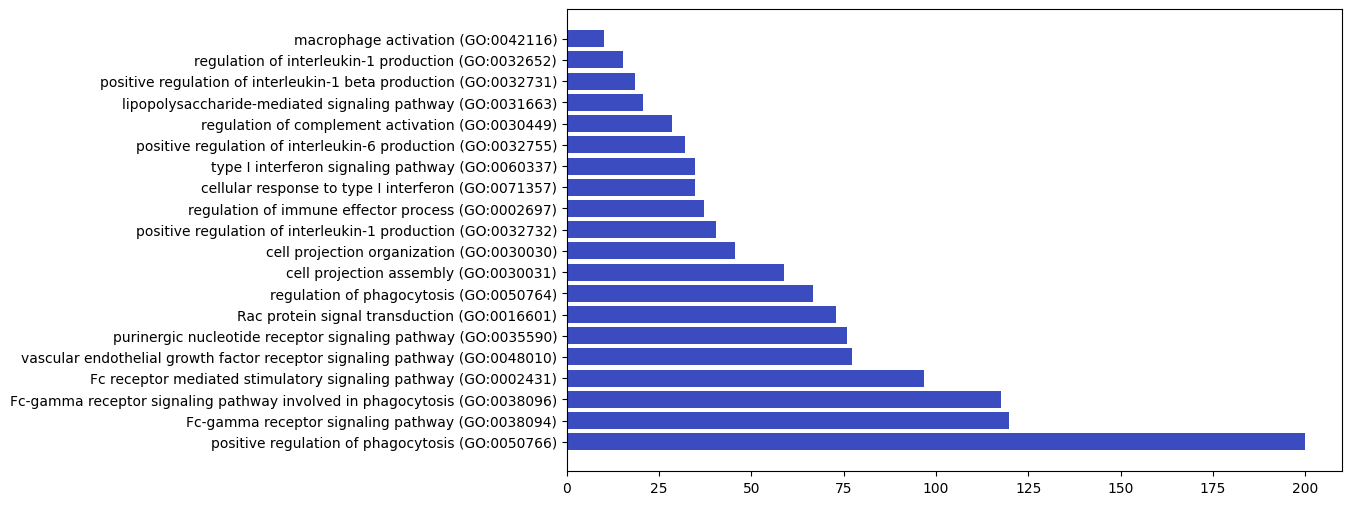

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named out_df_ANANSE_Nr1h3
top_n = 20  # Change this value to plot the top n rows

# Sort the DataFrame by the 'nes' column in descending order and select the top n rows
top_df = out_df_ANANSE_Nr1h3.sort_values('nes', ascending=False).head(top_n)

# Scaling the NES values between 10 and 200 for bar height
nes_min = top_df['nes'].min()
nes_max = top_df['nes'].max()
bar_heights = np.interp(top_df['nes'], (nes_min, nes_max), (10, 200))

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size
bar_colors = plt.cm.coolwarm(top_df['fdr'])  # Set bar colors based on FDR values
plt.barh(top_df['Term'], bar_heights, color=bar_colors)
plt.colorbar(label='False Discovery Rate (FDR)')  # Colorbar for FDR values
plt.xlabel('Normalized Enrichment Score (NES)')  # X-axis label
plt.ylabel('Term')  # Y-axis label
plt.title(f'Top {top_n} Enrichment Terms')  # Plot title
plt.tight_layout()  # Adjust the spacing
plt.show()  # Display the plot

/tmp/ipykernel_770903/372514891.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the spacing


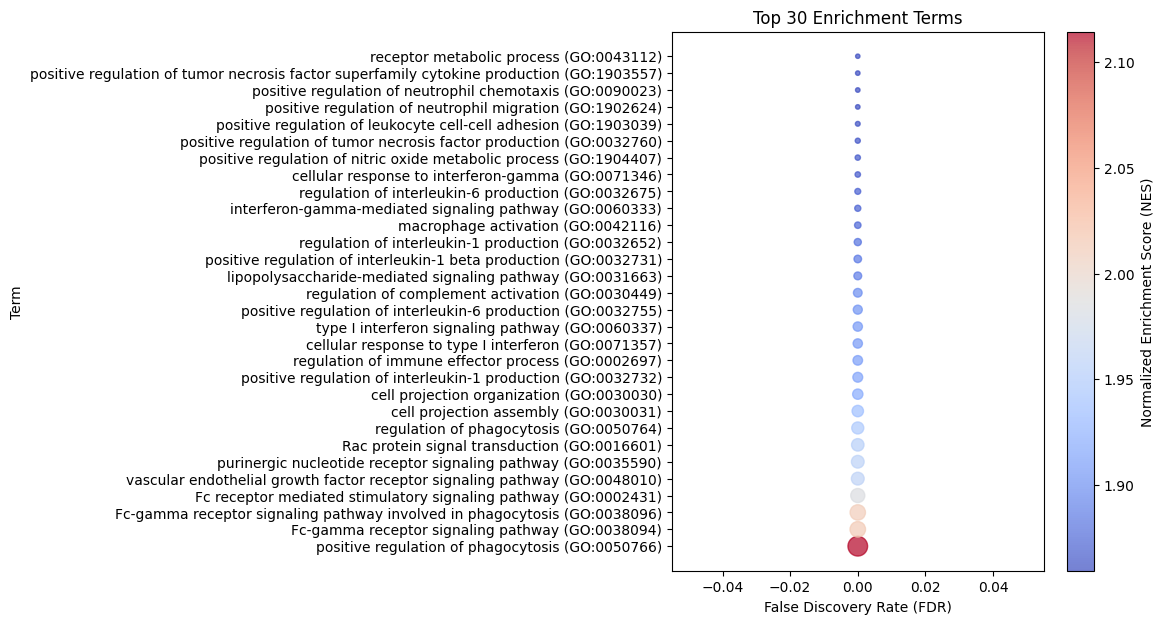

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named out_df_ANANSE_Nr1h3
top_n = 30  # Change this value to plot the top n rows

# Sort the DataFrame by the 'nes' column in descending order and select the top n rows
top_df = out_df_ANANSE_Nr1h3.sort_values('nes', ascending=False).head(top_n)

# Scaling the NES values between 10 and 200 for dot size
nes_min = top_df['nes'].min()
nes_max = top_df['nes'].max()
dot_sizes = np.interp(top_df['nes'], (nes_min, nes_max), (10, 200))

# Plotting the data
plt.figure(figsize=(6, 7))  # Set the figure size
plt.scatter(top_df['fdr'], top_df['Term'], c=top_df['nes'], s=dot_sizes, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Normalized Enrichment Score (NES)')  # Colorbar for NES values
plt.xlabel('False Discovery Rate (FDR)')  # X-axis label
plt.ylabel('Term')  # Y-axis label
plt.title(f'Top {top_n} Enrichment Terms')  # Plot title
plt.tight_layout()  # Adjust the spacing
plt.show()  # Display the plot


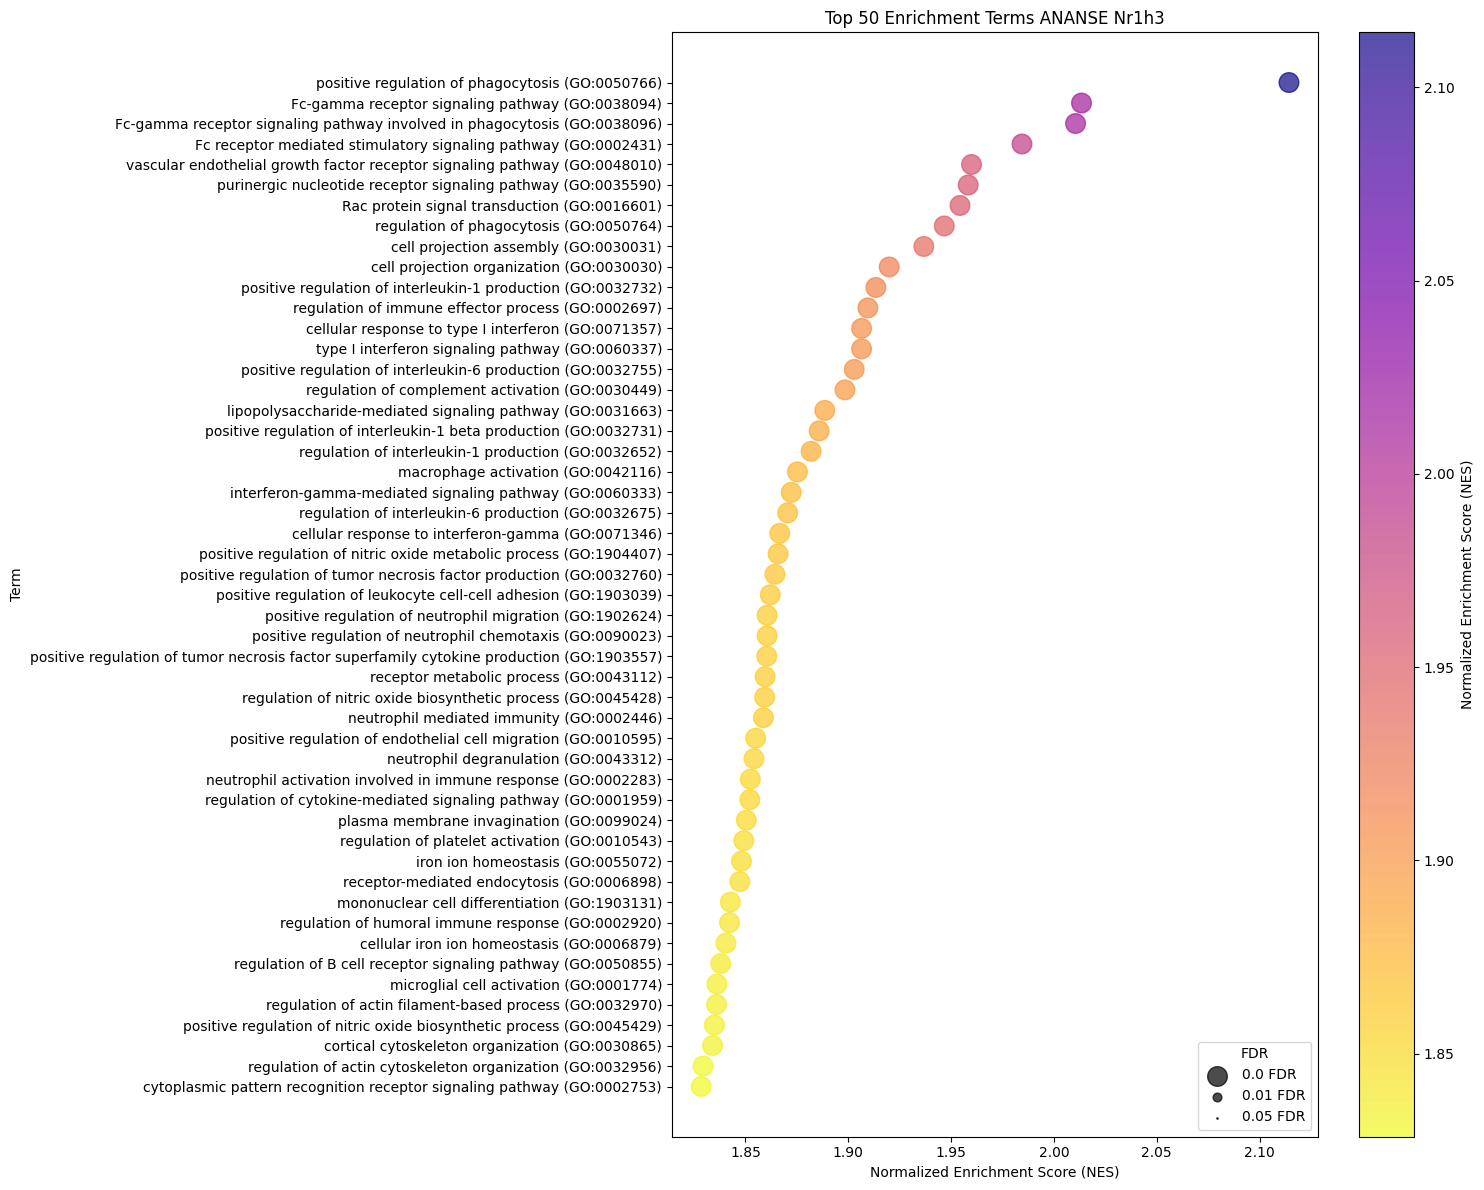

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named out_df_ANANSE_Nr1h3
top_n = 50  # Change this value to plot the top n rows

# Sort the DataFrame by the 'nes' column in descending order and select the top n rows
top_df = out_df_ANANSE_Nr1h3.sort_values('nes', ascending=False).head(top_n)

# Reverse the order of the DataFrame rows
top_df = top_df.iloc[::-1]

# Scaling the NES values between 10 and 200 for dot size
fdr_min = top_df['fdr'].min()
fdr_max = top_df['fdr'].max()
dot_sizes = np.interp(top_df['fdr'], (0.0, 0.05), (200, 1))
# dot_sizes = np.interp(top_df['fdr'], (fdr_min, fdr_max), (200, 1))

# Plotting the data
plt.figure(figsize=(15, 12))  # Set the figure size
scatter = plt.scatter(top_df['nes'], top_df['Term'], c=top_df['nes'], s=dot_sizes, cmap='plasma_r', alpha=0.7)
#plt.colorbar(scatter, label='False Discovery Rate (FDR)')  # Colorbar for NES values
plt.colorbar(scatter, label='Normalized Enrichment Score (NES)')  # Colorbar for NES values
plt.xlabel('Normalized Enrichment Score (NES)')  # X-axis label
plt.ylabel('Term')  # Y-axis label
plt.title(f'Top {top_n} Enrichment Terms ANANSE Nr1h3')  # Plot title

# Create a custom legend for dot sizes
sizes = [200, 39.8, 1]
labels = ['0.0 FDR', '0.01 FDR', '0.05 FDR']
#labels = [fdr_min, (fdr_min+fdr_max)/2, fdr_max]
legend_sizes = [plt.scatter([], [], s=size, color='black', alpha=0.7) for size in sizes]
plt.legend(legend_sizes, labels, title='FDR', loc='lower right')

plt.tight_layout()  # Adjust the spacing

# Save the figure before displaying it
fig1 = plt.gcf()
fig1.savefig(f'../Results/plots/Top{top_n}_EnrichTermsGSEA_ANANSE_Nr1h3_selScore.jpg'.format(top_n), format='jpg', dpi=300)
plt.show()
plt.close()

In [12]:
out_df_ANANSE_Nr1h3[out_df_ANANSE_Nr1h3['Term'].str.contains('ZEB2')]

,Term,fdr,es,nes


In [17]:
term_to_graph = out_df_ANANSE_Nr1h3.iloc[2].Term
term_to_graph

'Fc-gamma receptor signaling pathway involved in phagocytosis (GO:0038096)'

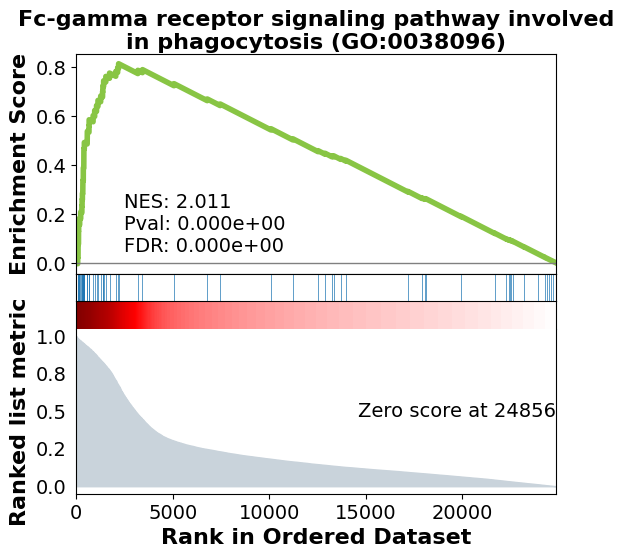

In [18]:
import matplotlib.pyplot as plt

# Set the desired figure size
figsize = (8, 15) 

gseaplot(pre_res_ANANSE.ranking, term = term_to_graph, **pre_res_ANANSE.results[term_to_graph])
# Save the plot
gene = "Nr1h3"
term = term_to_graph.replace(' ', '_')
term = term.replace('\\:', '_')
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_selScore_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

In [ ]:
#Example of user set of genes

In [21]:
#this block is just me making a enriched set of genes in the DE upregulated genes
#not required for GSEA
import random

def a_thing(x):
    if x < 0:
        return 1
    else:
        return x
df_ANANSE_Nr1h3['weights'] = df_ANANSE_Nr1h3.Rank.map(a_thing)

a_list = random.choices(df_ANANSE_Nr1h3.Gene.values, k = 100, weights = df_ANANSE_Nr1h3.weights.values)


AttributeError: 'function' object has no attribute 'map'

In [17]:
degs = pd.read_csv('../Results/Zeb2_Nr1h3_KO/DEGs/DEG_Nr1h3KOvsWT.tsv', sep='\t').dropna()
degs = degs.rename(columns = {'Unnamed: 0': 'Gene'})
degs = degs.sort_values(by=["p_val_adj","avg_log2FC"],ascending=[True,False]).reset_index(drop=True)

In [18]:
degs_up = degs[(degs.p_val_adj < 0.0000000001) & (degs.avg_log2FC > 0.5)].reset_index(drop=True)
degs_up = degs_up.sort_values(by=["avg_log2FC","p_val_adj"],ascending=[False, True]).reset_index(drop=True)
degs_up.to_csv("../Results/Zeb2_Nr1h3_KO/DEGs/Nr1h3_KO_DEG_UpRegSet.tsv", sep="\t", index=True)
degs_up['Gene'] = degs_up['Gene'].str.upper()
degs_up

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,APOC1,0.000000e+00,3.559507,0.987,0.448,0.000000e+00
1,CD5L,0.000000e+00,2.504448,0.996,0.762,0.000000e+00
2,C6,0.000000e+00,2.314795,0.860,0.192,0.000000e+00
3,CDH5,0.000000e+00,2.177179,0.858,0.212,0.000000e+00
4,CXCL13,6.802733e-162,2.010302,0.381,0.034,9.414982e-158
...,...,...,...,...,...,...
94,STAB2,3.368583e-47,0.512550,0.376,0.278,4.662119e-43
95,IRF7,8.101935e-67,0.506971,0.801,0.785,1.121308e-62
96,SLC1A2,8.190338e-50,0.506148,0.223,0.067,1.133543e-45
97,COLGALT1,5.433387e-63,0.503052,0.557,0.520,7.519807e-59


In [19]:
degs_down = degs[(degs.p_val_adj < 0.0000000001) & (degs.avg_log2FC < -0.5)].reset_index(drop=True)
degs_down = degs_down.sort_values(by=["avg_log2FC","p_val_adj"],ascending=[True,True]).reset_index(drop=True)
degs_down.to_csv("../Results/Zeb2_Nr1h3_KO/DEGs/Nr1h3_KO_DEG_DownRegSet.tsv", sep="\t", index=True)
degs_down['Gene'] = degs_down['Gene'].str.upper()
degs_down

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,CCR3,0.000000e+00,-2.099660,0.101,0.766,0.000000e+00
1,H2-EB1,4.716944e-319,-1.617276,0.770,0.979,6.528250e-315
2,PF4,4.345785e-239,-1.555988,0.497,0.855,6.014566e-235
3,NR1H3,0.000000e+00,-1.545947,0.820,0.982,0.000000e+00
4,CD74,9.365745e-287,-1.528644,0.932,0.995,1.296219e-282
...,...,...,...,...,...,...
79,H2AFZ,1.174200e-49,-0.507586,0.773,0.907,1.625093e-45
80,HSPA8,2.037901e-92,-0.506909,0.931,0.984,2.820455e-88
81,HSP90AA1,8.369662e-62,-0.504720,0.621,0.844,1.158361e-57
82,SLC25A5,1.589931e-73,-0.504102,0.781,0.930,2.200464e-69


In [20]:
# Assuming you have already imported the necessary libraries and have the 'degs' dataframe
# Randomly selecting 100 genes/rows
degs['Gene'] = degs['Gene'].str.upper()
degs_random = degs.sample(n=100, random_state=32)  # Adjust the random_state as desired
# Resetting the index of the new dataframe
degs_random = degs_random.reset_index(drop=True)
# Sorting the dataframe by "p_val_adj" and "avg_log2FC" columns (optional)
degs_random = degs_random.sort_values(by=["p_val_adj", "avg_log2FC"], ascending=[True, True]).reset_index(drop=True)
degs_random

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,CD164,2.280367e-113,0.638338,0.880,0.854,3.156028e-109
1,RPL4,1.488685e-99,-0.600085,0.782,0.945,2.060340e-95
2,RAB3IL1,3.702712e-85,-0.411044,0.194,0.470,5.124554e-81
3,CD72,9.815107e-73,0.672981,0.535,0.378,1.358411e-68
4,RILPL2,4.924951e-56,-0.300425,0.214,0.432,6.816132e-52
...,...,...,...,...,...,...
95,CYTH3,2.360670e-12,-0.021734,0.093,0.139,3.267168e-08
96,ERMARD,2.410059e-12,0.015865,0.086,0.119,3.335522e-08
97,GM13139,3.008986e-11,0.019482,0.092,0.122,4.164436e-07
98,CTSS,9.003678e-11,0.124052,0.996,0.997,1.246109e-06


In [89]:
# Randomly sampling 100 rows
random_gene_set = ranking_ANANSE.sample(n=100, random_state=42) 
random_gene_set

,target,selection_score
7125,1810010D01RIK,0.239844
24474,IGKV13-84,0.005191
3256,TCAP,0.471577
21190,SORBS3,0.050354
5140,WRAP73,0.299740
...,...,...
11208,RASSF7,0.165170
3690,GM15133,0.412119
24197,CPD,0.008936
19814,GM16086,0.066088


In [1]:
degs_list_up = list(degs_up["Gene"])
degs_list_down = list(degs_down["Gene"])
degs_list_random = list(random_gene_set["target"])
len(degs_list_up)
len(degs_list_down)
len(degs_list_random)
len(degs)

NameError: name 'degs_up' is not defined

In [159]:
# We shuffle the ranking to have it as a control
shuffled_ANANSE = ranking_ANANSE.sample(frac=1, random_state=35)
shuffled_ANANSE = shuffled_ANANSE.reset_index(drop=True)
shuffled_ANANSE["selection_score"] = range(len(shuffled_ANANSE))
shuffled_ANANSE

,target,selection_score
0,BTF3,0
1,ARXES1,1
2,OLFR729,2
3,PRAME,3
4,GSTZ1,4
...,...,...
24852,GM45261,24852
24853,ZFP157,24853
24854,GM43951,24854
24855,DSG1B,24855


In [160]:
user_set = {'DEGs KC Nr1h3 KO UP' : degs_list_up, 'DEGs KC Nr1h3 KO DOWN' : degs_list_down,'RANDOM SET GENES' : degs_list_random,}

In [164]:
# Now with the suffled ranking
shuffle_res_ANANSE = gp.prerank(rnk = shuffled_ANANSE, gene_sets = user_set, seed = 56)
shuffle_res_ANANSE

# Now with the real rank
pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = user_set, seed = 28)
pre_res_ANANSE

2023-07-03 14:50:39,830 [WARNING] Duplicated values found in preranked stats: 0.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [165]:
ranking_res = shuffle_res_ANANSE

out = []

for term in list(ranking_res.results):
    out.append([term,
               ranking_res.results[term]['fdr'],
               ranking_res.results[term]['es'],
               ranking_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df[0:50]

,Term,fdr,es,nes
0,DEGs KC Nr1h3 KO UP,0.320000,0.313701,1.106073
1,RANDOM SET GENES,0.420000,0.325874,1.148373
2,DEGs KC Nr1h3 KO DOWN,0.546333,0.280990,0.981446


In [166]:
ranking_res = pre_res_ANANSE

out = []

for term in list(ranking_res.results):
    out.append([term,
               ranking_res.results[term]['fdr'],
               ranking_res.results[term]['es'],
               ranking_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df[0:50]

,Term,fdr,es,nes
0,DEGs KC Nr1h3 KO DOWN,0.000000,0.807325,2.018117
1,DEGs KC Nr1h3 KO UP,0.000000,0.861834,2.175499
2,RANDOM SET GENES,0.718667,0.367967,0.931641


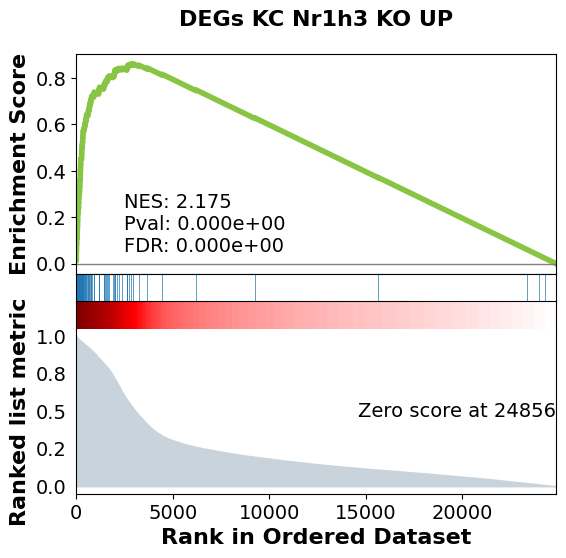

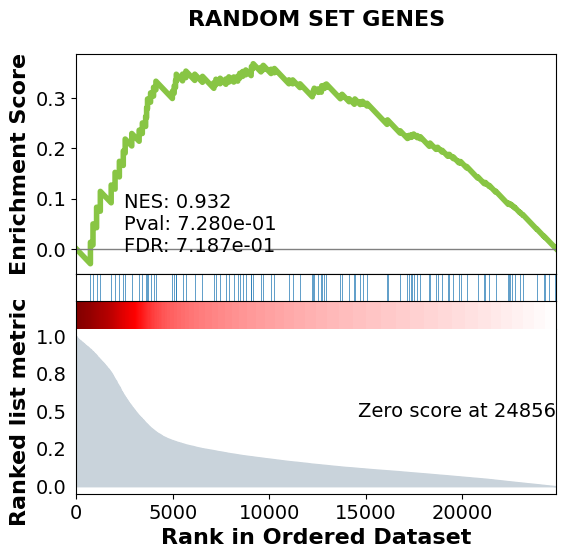

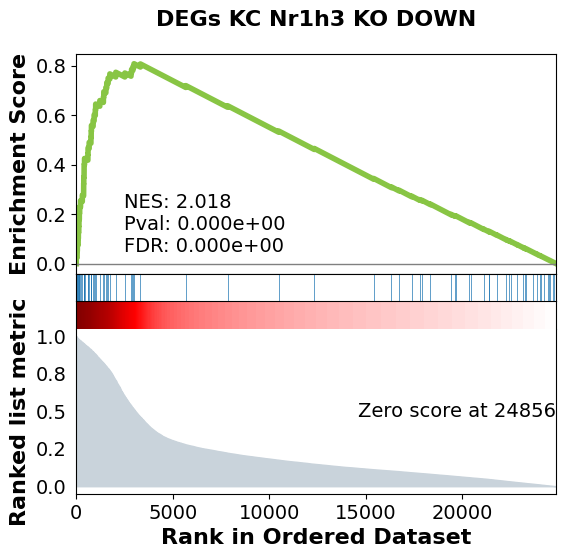

In [163]:
import matplotlib.pyplot as plt

gene = "Nr1h3"

# Upregulated genes
term_to_graph = out_df.iloc[0].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(pre_res_ANANSE.ranking, term =  term_to_graph, **pre_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_selScore_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

# Downregulated genes
term_to_graph = out_df.iloc[1].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(pre_res_ANANSE.ranking, term =  term_to_graph, **pre_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_selScore_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

# Random genes
term_to_graph = out_df.iloc[2].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(pre_res_ANANSE.ranking, term =  term_to_graph, **pre_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_selScore_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

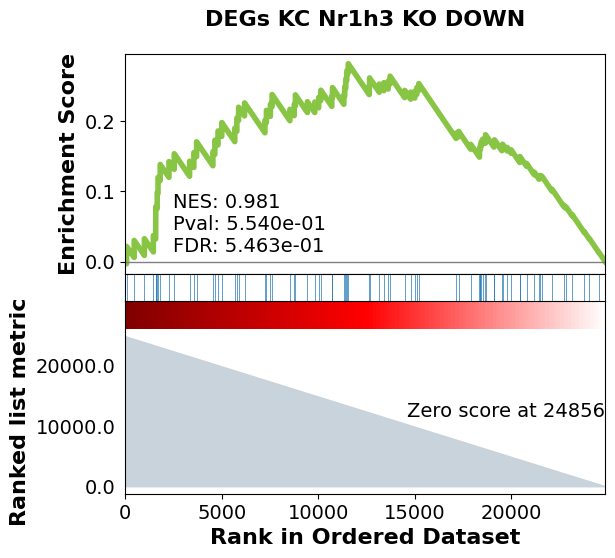

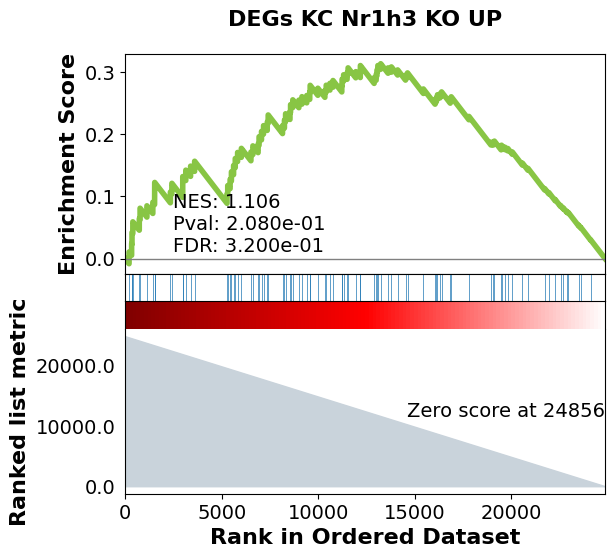

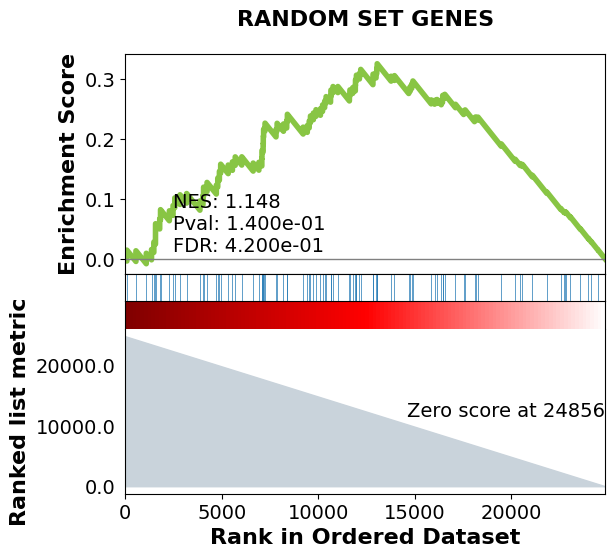

In [167]:
import matplotlib.pyplot as plt

gene = "Nr1h3"

# Upregulated genes
term_to_graph = out_df.iloc[0].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(shuffle_res_ANANSE.ranking, term =  term_to_graph, **shuffle_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_shuffle_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

# Downregulated genes
term_to_graph = out_df.iloc[1].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(shuffle_res_ANANSE.ranking, term =  term_to_graph, **shuffle_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_shuffle_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

# Random genes
term_to_graph = out_df.iloc[2].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(shuffle_res_ANANSE.ranking, term =  term_to_graph, **shuffle_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_shuffle_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

In [168]:
#degs_down = degs[(degs.p_val_adj < 0.01) & (degs.avg_log2FC < -0)].reset_index(drop=True)
degs_down = degs[(degs.avg_log2FC < -0)].reset_index(drop=True)
degs_down = degs_down.sort_values(by=["avg_log2FC", "p_val_adj"],ascending=[True,True]).reset_index(drop=True)
degs_down

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,CCR3,0.000000e+00,-2.099660,0.101,0.766,0.000000e+00
1,H2-EB1,4.716944e-319,-1.617276,0.770,0.979,6.528250e-315
2,PF4,4.345785e-239,-1.555988,0.497,0.855,6.014566e-235
3,NR1H3,0.000000e+00,-1.545947,0.820,0.982,0.000000e+00
4,CD74,9.365745e-287,-1.528644,0.932,0.995,1.296219e-282
...,...,...,...,...,...,...
3283,FKBP15,1.528774e-35,-0.000150,0.268,0.379,2.115823e-31
3284,POLR2F,2.206703e-37,-0.000100,0.467,0.598,3.054077e-33
3285,TAF15,1.347839e-33,-0.000095,0.144,0.228,1.865409e-29
3286,HDAC2,5.501616e-31,-0.000088,0.182,0.271,7.614236e-27


In [169]:
#degs_up = degs[(degs.p_val_adj < 0.01) & (degs.avg_log2FC > 0)].reset_index(drop=True)
degs_up = degs[(degs.avg_log2FC > 0)].reset_index(drop=True)
degs_up = degs_up.sort_values(by=["avg_log2FC", "p_val_adj"],ascending=[False,True]).reset_index(drop=True)
degs_up

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,APOC1,0.000000e+00,3.559507,0.987,0.448,0.000000e+00
1,CD5L,0.000000e+00,2.504448,0.996,0.762,0.000000e+00
2,C6,0.000000e+00,2.314795,0.860,0.192,0.000000e+00
3,CDH5,0.000000e+00,2.177179,0.858,0.212,0.000000e+00
4,CXCL13,6.802733e-162,2.010302,0.381,0.034,9.414982e-158
...,...,...,...,...,...,...
3105,SEPT8,6.501666e-24,0.000057,0.173,0.248,8.998306e-20
3106,HDGF,4.171662e-34,0.000045,0.462,0.594,5.773580e-30
3107,PDGFA,6.530283e-10,0.000021,0.082,0.116,9.037912e-06
3108,RPS26-PS1,4.413212e-40,0.000017,0.551,0.700,6.107886e-36


In [173]:
degs_GO = degs_up[["Gene", "avg_log2FC"]]
degs_GO
degs_GO

pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'GO_Biological_Process_2021', seed = 12, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'TF_Perturbations_Followed_by_Expression', seed = 27, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'WikiPathways_2019_Mouse', seed = 27, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'ChEA_2022', seed = 27, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'Reactome_2022', seed = 27, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'KEGG_2021_Human', seed = 27, permutation_num = 100)
degs_GO

out = []

for term in list(pre_res_DEGs.results):
    out.append([term,
               pre_res_DEGs.results[term]['fdr'],
               pre_res_DEGs.results[term]['es'],
               pre_res_DEGs.results[term]['nes']])

out_df_DEGS_Nr1h3 = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('nes', ascending=False).reset_index(drop = True)
out_df_DEGS_Nr1h3[0:50]

2023-07-03 15:37:41,660 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!


,Term,fdr,es,nes
0,regulation of humoral immune response (GO:0002...,0.000000,0.911273,1.784262
1,regulation of complement activation (GO:0030449),0.019742,0.875286,1.713136
2,response to reactive oxygen species (GO:0000302),0.065806,0.806946,1.648136
3,regulation of cytosolic calcium ion concentrat...,0.098709,0.779539,1.618238
4,positive regulation of supramolecular fiber or...,0.088838,0.828538,1.616313
5,phospholipid transport (GO:0015914),0.074032,0.830177,1.615701
6,negative regulation of defense response (GO:00...,0.094478,0.784598,1.601818
7,positive regulation of cellular metabolic proc...,0.099943,0.781683,1.591551
8,positive regulation of vasculature development...,0.098709,0.747216,1.586257
9,positive regulation of ERK1 and ERK2 cascade (...,0.138192,0.754164,1.571495


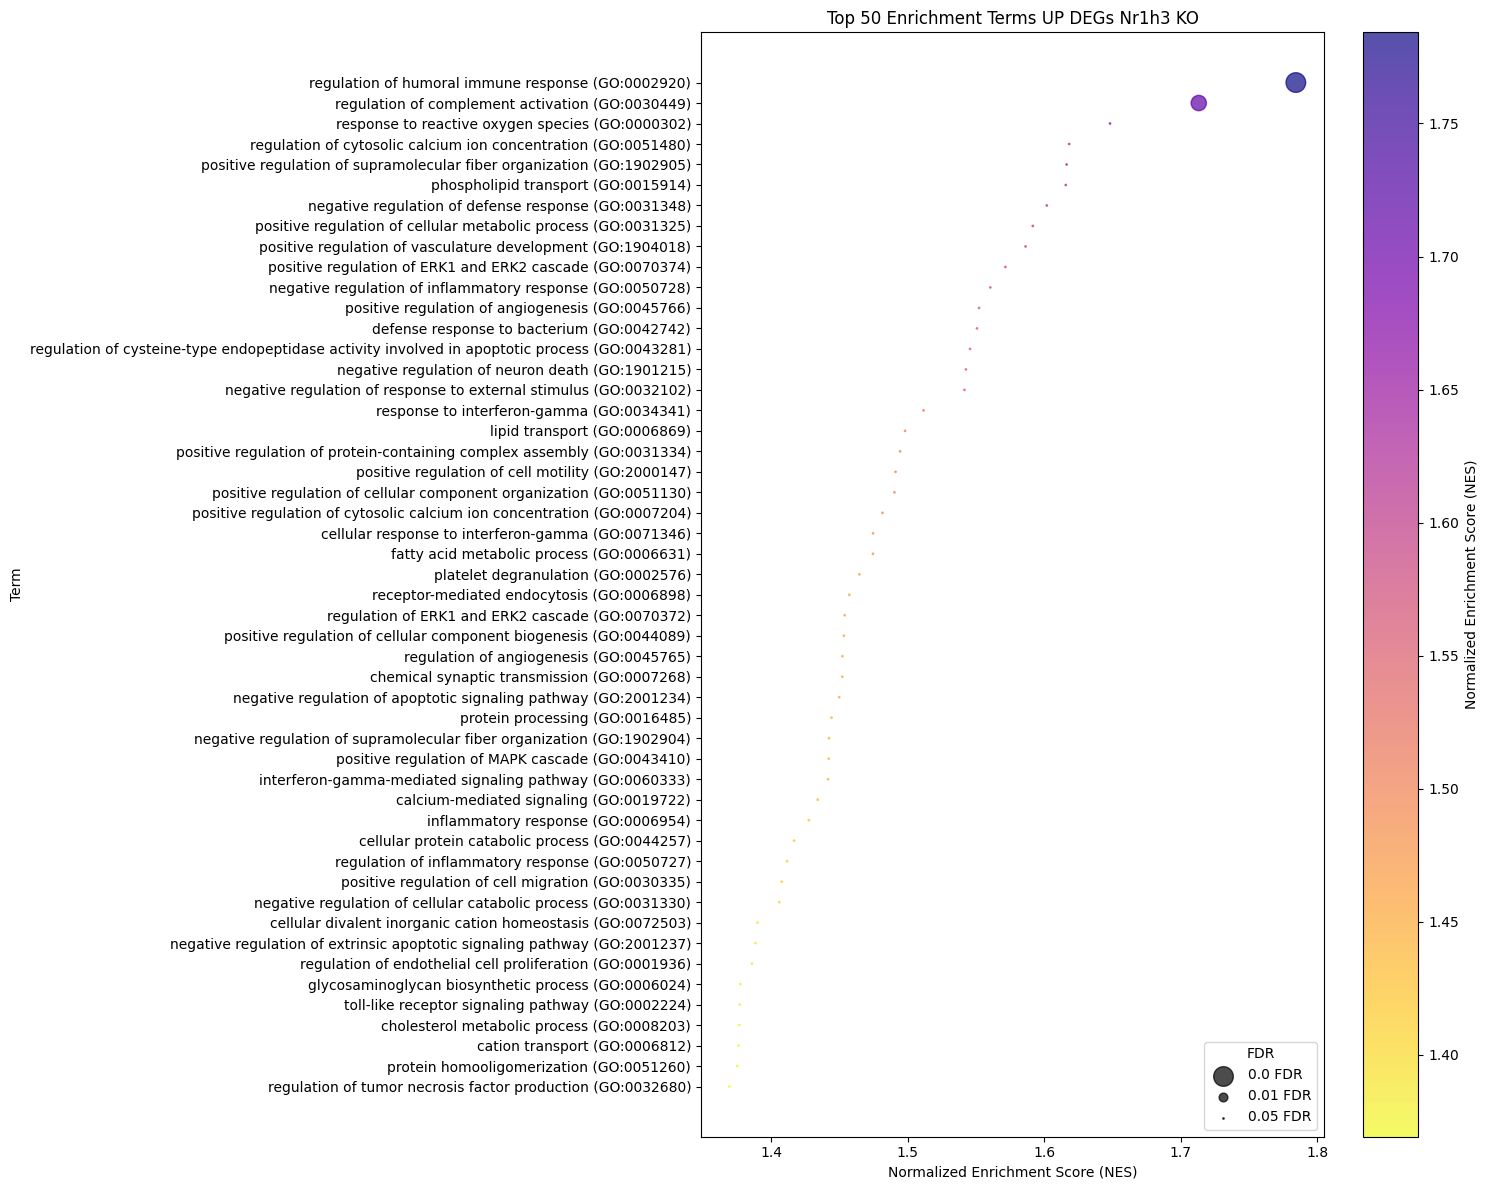

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named out_df_ANANSE_Zeb2
top_n = 50  # Change this value to plot the top n rows

# Sort the DataFrame by the 'nes' column in descending order and select the top n rows
top_df = out_df_DEGS_Nr1h3.sort_values('nes', ascending=False).head(top_n)

# Reverse the order of the DataFrame rows
top_df = top_df.iloc[::-1]

# Scaling the NES values between 10 and 200 for dot size
fdr_min = top_df['fdr'].min()
fdr_max = top_df['fdr'].max()
dot_sizes = np.interp(top_df['fdr'], (0.0, 0.05), (200, 1))
# dot_sizes = np.interp(top_df['fdr'], (fdr_min, fdr_max), (200, 1))

# Plotting the data
plt.figure(figsize=(15, 12))  # Set the figure size
scatter = plt.scatter(top_df['nes'], top_df['Term'], c=top_df['nes'], s=dot_sizes, cmap='plasma_r', alpha=0.7)
#plt.colorbar(scatter, label='False Discovery Rate (FDR)')  # Colorbar for NES values
plt.colorbar(scatter, label='Normalized Enrichment Score (NES)')  # Colorbar for NES values
plt.xlabel('Normalized Enrichment Score (NES)')  # X-axis label
plt.ylabel('Term')  # Y-axis label
plt.title(f'Top {top_n} Enrichment Terms UP DEGs Nr1h3 KO')  # Plot title

# Create a custom legend for dot sizes
sizes = [200, 39.8, 1]
labels = ['0.0 FDR', '0.01 FDR', '0.05 FDR']
#labels = [fdr_min, (fdr_min+fdr_max)/2, fdr_max]
legend_sizes = [plt.scatter([], [], s=size, color='black', alpha=0.7) for size in sizes]
plt.legend(legend_sizes, labels, title='FDR', loc='lower right')

plt.tight_layout()  # Adjust the spacing

# Save the figure before displaying it
fig1 = plt.gcf()
fig1.savefig(f'../Results/plots/Top{top_n}_EnrichTermsGSEA_DEGS_UP_Nr1h3.jpg'.format(top_n), format='jpg', dpi=300)
plt.show()
plt.close()